<a href="https://colab.research.google.com/github/Brilliyandddd/Machine_Learning/blob/main/JS11_Brilliyand_Noval_Herdana_Putra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Brilliyand Noval Herdana Putra
# NIM : 2141720104
# Kelas : TI-3D

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Praktikum 1

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/week11/dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Machine Learning/week11/dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [12]:
cnn = tf.keras.models.Sequential()

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [14]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [16]:
cnn.add(tf.keras.layers.Flatten())

In [17]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [18]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [19]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 1210s 5s/step - loss: 0.6681 - accuracy: 0.5990 - val_loss: 0.6450 - val_accuracy: 0.6600
Epoch 2/25
250/250 [==============================] - 79s 314ms/step - loss: 0.6154 - accuracy: 0.6681 - val_loss: 0.5777 - val_accuracy: 0.7120
Epoch 3/25
250/250 [==============================] - 79s 316ms/step - loss: 0.5713 - accuracy: 0.7041 - val_loss: 0.5271 - val_accuracy: 0.7480
Epoch 4/25
250/250 [==============================] - 87s 346ms/step - loss: 0.5348 - accuracy: 0.7284 - val_loss: 0.5162 - val_accuracy: 0.7570
Epoch 5/25
250/250 [==============================] - 82s 328ms/step - loss: 0.5155 - accuracy: 0.7461 - val_loss: 0.5270 - val_accuracy: 0.7575
Epoch 6/25
250/250 [==============================] - 82s 328ms/step - loss: 0.4976 - accuracy: 0.7579 - val_loss: 0.5056 - val_accuracy: 0.7620
Epoch 7/25
250/250 [==============================] - 82s 328ms/step - loss: 0.4753 - accuracy: 0.7729 - val_loss: 0.5003 - val_acc

In [21]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Machine Learning/week11/dataset/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 98ms/step


## Praktikum 2

In [22]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [23]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

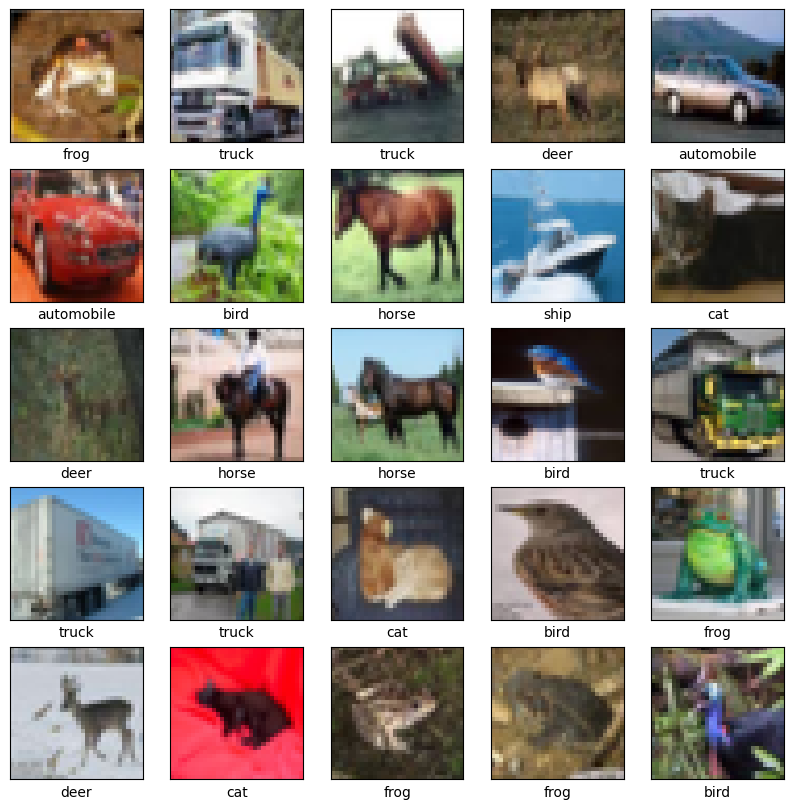

In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 86s 54ms/step - loss: 1.5214 - accuracy: 0.4475 - val_loss: 1.2793 - val_accuracy: 0.5449
Epoch 2/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.1589 - accuracy: 0.5898 - val_loss: 1.1054 - val_accuracy: 0.6076
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.0148 - accuracy: 0.6408 - val_loss: 1.0147 - val_accuracy: 0.6406
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.9171 - accuracy: 0.6759 - val_loss: 0.9338 - val_accuracy: 0.6751
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8490 - accuracy: 0.7032 - val_loss: 0.9089 - val_accuracy: 0.6867
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7885 - accuracy: 0.7240 - val_loss: 0.8908 - val_accuracy: 0.6911
Epoch 7/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.7420 - accuracy: 0.7398 - val_loss: 0.8888 -

313/313 - 4s - loss: 0.8833 - accuracy: 0.7010 - 4s/epoch - 11ms/step


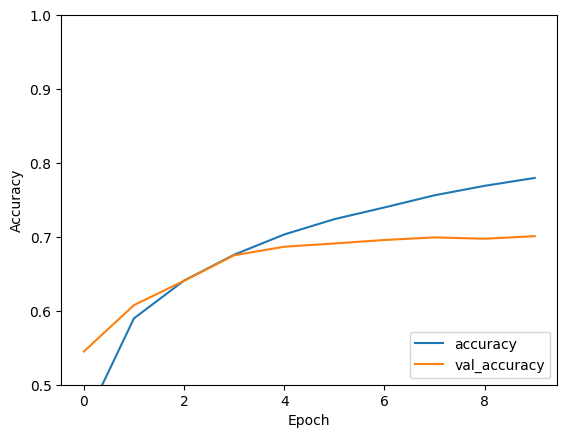

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [32]:
print(test_acc)

0.7009999752044678


## Tugas Praktikum

In [33]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [34]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [35]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [36]:
model = models.Sequential()

In [37]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [38]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(layers.Dense(10, activation='softmax'))

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 89s 56ms/step - loss: 1.6108 - accuracy: 0.4083 - val_loss: 1.2563 - val_accuracy: 0.5453
Epoch 2/20
1563/1563 [==============================] - 92s 59ms/step - loss: 1.2403 - accuracy: 0.5629 - val_loss: 1.1327 - val_accuracy: 0.5931
Epoch 3/20
1563/1563 [==============================] - 88s 56ms/step - loss: 1.0934 - accuracy: 0.6203 - val_loss: 0.9835 - val_accuracy: 0.6573
Epoch 4/20
1563/1563 [==============================] - 92s 59ms/step - loss: 0.9944 - accuracy: 0.6548 - val_loss: 0.9391 - val_accuracy: 0.6713
Epoch 5/20
1563/1563 [==============================] - 87s 55ms/step - loss: 0.9126 - accuracy: 0.6833 - val_loss: 0.9113 - val_accuracy: 0.6830
Epoch 6/20
1563/1563 [==============================] - 95s 61ms/step - loss: 0.8557 - accuracy: 0.7021 - val_loss: 0.8993 - val_accuracy: 0.6878
Epoch 7/20
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8086 - accuracy: 0.7205 - val_loss: 0.8602 -

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 6s - loss: 0.9514 - accuracy: 0.7219 - 6s/epoch - 18ms/step
Test accuracy: 0.7218999862670898


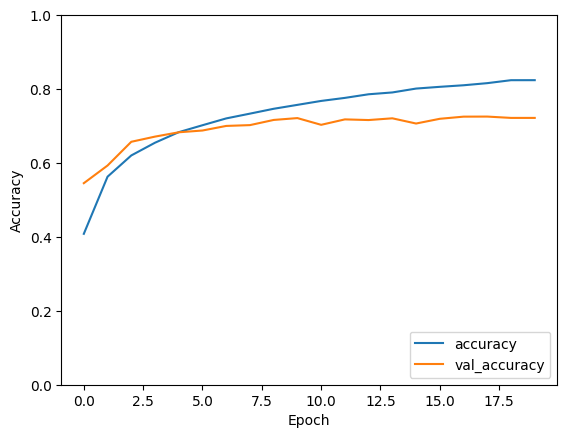

In [42]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [43]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [44]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [45]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 75s 39ms/step - loss: 0.1562 - accuracy: 0.9523 - val_loss: 0.0501 - val_accuracy: 0.9844
Epoch 2/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0485 - accuracy: 0.9856 - val_loss: 0.0411 - val_accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.0340 - val_accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.0363 - val_accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.0306 - val_accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0342 - val_accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0140 - accuracy: 0.9951 - val_loss: 0.0301 -

In [49]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 3s - loss: 0.0353 - accuracy: 0.9905 - 3s/epoch - 9ms/step
Test accuracy: 0.9904999732971191


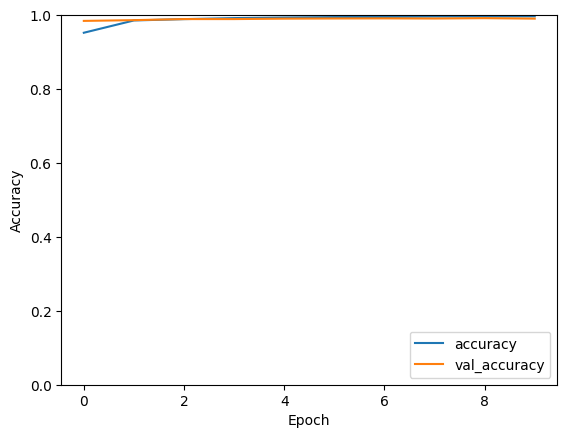

In [50]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()